# Lead Scoring Case Study

## 1) Importing libraries and reading the data

### Importing Libraries-

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

### Reading dataset-

In [8]:
edu_lead = pd.read_csv("Leads.csv")
edu_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#display settings of the dataset

pd.set_option('display.max_rows', 10000000000)
pd.set_option('display.max_columns', 10000000000)
pd.set_option('display.width', 95)

In [10]:
#  print the first five rows of our dataframe
print(edu_lead.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity Country  \
0  

In [11]:
# view the shape of the dataframe. Specifically the number of rows and columns present.
print('This DataFrame has %d Rows and %d Columns'%(edu_lead.shape))

This DataFrame has 9240 Rows and 37 Columns


In [12]:
#basic information of the dataset
edu_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
edu_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [14]:
#check for duplicates

sum(edu_lead.duplicated(subset = 'Prospect ID')) == 0

True

In [15]:
#check for duplicates

sum(edu_lead.duplicated(subset = 'Lead Number')) == 0

True

## 2) Data Exploration

### Data Cleaning And Treatment-

In [16]:
#Converting 'Select' values to NaN.

edu_lead = edu_lead.replace('Select', np.nan)

In [17]:
# Checking if there are columns with one unique value 

edu_lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [18]:
#dropping Lead Number and Prospect ID since they have all unique values

edu_lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [19]:
#checking percentage of null values in each column

round(100*(edu_lead.isnull().sum()/len(edu_lead.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [20]:
#dropping cols with more than 45% missing values

column_to_drop=edu_lead.columns

for i in column_to_drop:
    if((100*(edu_lead[i].isnull().sum()/len(edu_lead.index))) >= 45):
        edu_lead.drop(i, 1, inplace = True)

In [21]:
#checking null values percentage

round(100*(edu_lead.isnull().sum()/len(edu_lead.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [22]:
#checking value counts of 'city' column

edu_lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
edu_lead['City'] = edu_lead['City'].replace(np.nan,'Mumbai')

Observation-

As Mumbai has maximum number of values after Nan and Value difference between Thane and Mumbai is quite high 

So replacing NaN values with Mumbai

In [24]:
#checking value counts of 'Specialization' column

edu_lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
edu_lead['Specialization'] = edu_lead['Specialization'].replace(np.nan, 'Not Specified')

Observation-

Lead may not have mentioned specialization because it was not in the list or maybe they are a students

and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

In [26]:
#checking value counts of 'Tags' column

edu_lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
#replacing Nan values with "Not Specified"
edu_lead['Tags'] = edu_lead['Tags'].replace(np.nan,'Not Specified')

Observation-

As the values are close to each other,so can't replace NaN with any one value.Therefore,replacing NaN with 'Not Specified'

In [28]:
#checking value counts of 'What matters most to you in choosing a course' column

edu_lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
#replacing Nan values with Mode "Better Career Prospects"

edu_lead['What matters most to you in choosing a course'] = edu_lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

Observation-

'Better Career Prospects' maximum in number with huge margin as compared to next one.So replacing NaN with it.


In [30]:
#checking value counts of 'What is your current occupation' column

edu_lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
edu_lead['What is your current occupation'] = edu_lead['What is your current occupation'].replace(np.nan, 'Unemployed')

Observation-

'Unemployed' maximum in number with huge margin as compared to next one.So replacing NaN with it.

In [32]:
#checking value counts of 'Country ' column

edu_lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [33]:
edu_lead['Country'] = edu_lead['Country'].replace(np.nan,'India')

Observation-

Since India is the most common occurence among the non-missing values we can impute all missing values with India.

In [34]:
#checking null values percentage

round(100*(edu_lead.isnull().sum()/len(edu_lead.index)), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Magazine                                         0.00
Newspaper Article                                0.00
Search                      

In [35]:
#checking value counts of 'Last Activity' column

edu_lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [36]:
#checking value counts of 'Lead Source ' column

edu_lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [37]:
#replacing Nan Values 
edu_lead['Lead Source'] = edu_lead['Lead Source'].replace(np.nan,'Others')

Observation-

Replacing NaN with 'Others' in Lead Source column because NaN value is very small and replacing it with any other value will cause error while analysing.

In [38]:
#replacing Nan Values 

edu_lead['Last Activity'] = edu_lead['Last Activity'].replace(np.nan,'Others')

Observation-

Replacing NaN with 'Others' in Lead Activity column because NaN value is very small and replacing it with any other value will cause error while analysing.

In [39]:
#checking null values percentage

round(100*(edu_lead.isnull().sum()/len(edu_lead.index)), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Magazine                                         0.00
Lead Source                                      0.00
Search                                           0.00
What matters most to you in 

In [40]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
edu_lead = edu_lead.dropna()

In [41]:
#final check of  null values percentage

round(100*(edu_lead.isnull().sum()/len(edu_lead.index)), 2).sort_values(ascending=False)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

Observation-

All null values have been treated properly.

### Combining Data In Different Columns For Data Visualization-

In [42]:
#combining Management Specializations because they show similar trends

edu_lead['Specialization'] = edu_lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Different_Management_Specializations')  

In [43]:
#combining low frequency tags as "Other Tags"
edu_lead['Tags'] = edu_lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')



In [44]:
# combining low frequency values as 'Other_Lead_Source'

edu_lead['Lead Source'] = edu_lead['Lead Source'].replace('google','Google')
edu_lead['Lead Source'] = edu_lead['Lead Source'].replace('Facebook','Facebook')
edu_lead['Lead Source'] = edu_lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Other_Lead_Source') 

In [45]:
# combining low frequency values 

edu_lead['Last Activity'] = edu_lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Other_Last_Activity')

In [46]:
#checking value counts of last Notable Activity
edu_lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [47]:
#clubbing lower frequency values

edu_lead['Last Notable Activity'] = edu_lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

### Creating A List Of Columns To Be Droppped-



In [48]:
# Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped
columns_to_drop=['Country']

In [49]:
# Number of Values for 'Better Career Prospects' are quite high, this column can be dropped
columns_to_drop.append('What matters most to you in choosing a course')


In [50]:
#checking value counts for Do Not Call
edu_lead['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [51]:
# We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value
columns_to_drop.append('Do Not Call')

In [52]:
columns_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

### Imbalance Variables Can Be Dropped -

In [53]:
# we can drop this column as more than 90% is one value
edu_lead.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [54]:
# we can drop this column as more than 90% is one value
edu_lead.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [55]:
# we can drop this column as more than 90% is one value
edu_lead['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [56]:
# we can drop this column as more than 90% is one value
edu_lead['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [57]:
# we can drop this column as more than 90% is one value
edu_lead['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [58]:
# we can drop this column as more than 90% is one value
edu_lead['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [59]:
# we can drop this column as more than 90% is one value
edu_lead['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [60]:
# we can drop this column as more than 90% is one value
edu_lead['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [61]:
# we can drop this column as more than 90% is one value
edu_lead['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [62]:
# we can drop this column as more than 90% is one value
edu_lead['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [63]:
# we can drop this column as more than 90% is one value
edu_lead['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [64]:
# we cannot drop this column as values are well distributed
edu_lead['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [65]:
#adding imbalanced columns to the list of columns to be dropped

columns_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
              'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content',
                'Get updates on DM Content','I agree to pay the amount through cheque'])

In [66]:
#list of columns to be dropped
columns_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [67]:
#dropping columns
edu_lead = edu_lead.drop(columns_to_drop,1)
edu_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

Observation-

After dropping the columns,we are left with 14 columns .

In [68]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(edu_lead['Converted'])/len(edu_lead['Converted'].index))*100
Converted

38.02043282434362

In [69]:
edu_lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.354939,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


### Visualization -

#### Categorical Variables :

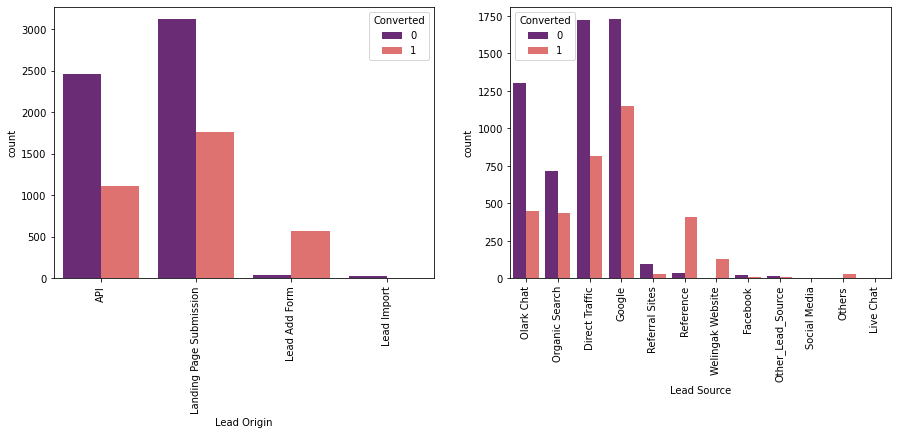

In [70]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(edu_lead['Lead Origin'], hue=edu_lead.Converted,palette="magma")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(edu_lead['Lead Source'], hue=edu_lead.Converted,palette="magma")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)


plt.show()

Observation-

Lead Origin:

Landing Page Submission and API  bring high number of leads as well as conversion(converted=1)

Lead Add Form has a very high conversion rate but count of leads are low

Lead Import  get very few leads.

In order to improve overall lead conversion rate, we need to improve lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


Lead source :

Google has high number of leads along with high converted number.

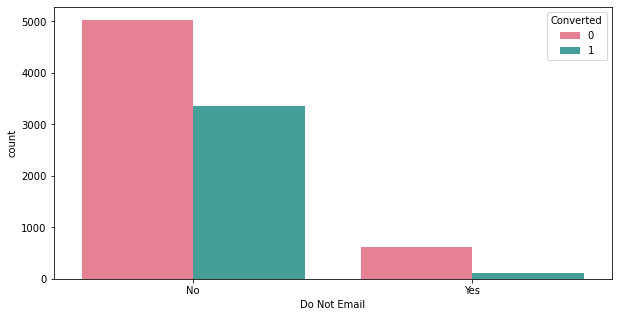

In [71]:
plt.figure(figsize=(10,5))
ax=sns.countplot(edu_lead['Do Not Email'], hue=edu_lead.Converted,palette="husl")
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

Observation-

An indicator variable selected by the customer wherein they select whether or not they want to be emailed about the course or not.

Here maximum number do not want to get mail,which also has high converted rate

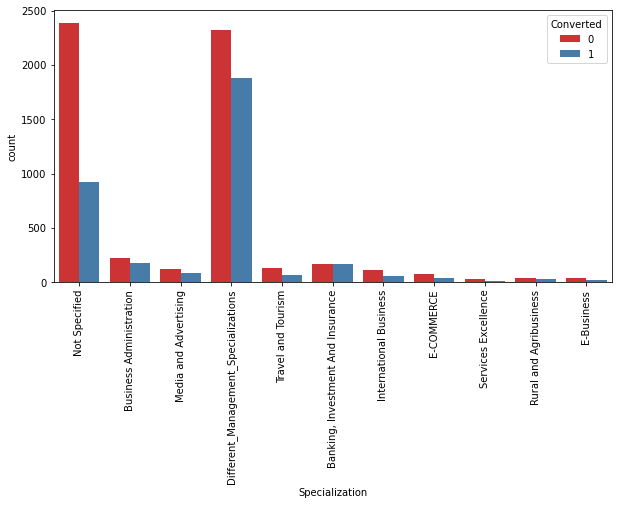

In [72]:
plt.figure(figsize=(10,5))
ax=sns.countplot(edu_lead['Specialization'], hue=edu_lead.Converted,palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Observation-

The specializations with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable .

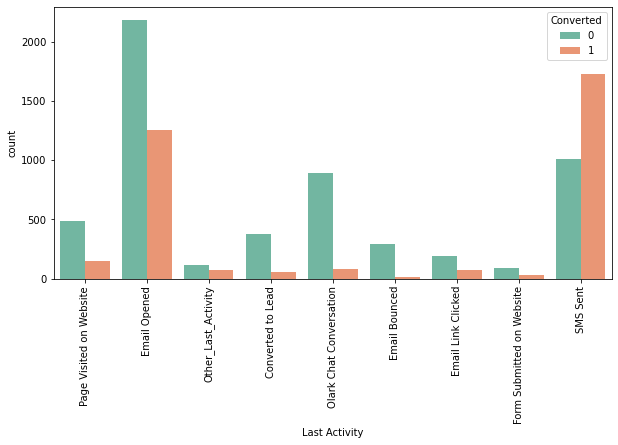

In [73]:
plt.figure(figsize=(10,5))
ax=sns.countplot(edu_lead['Last Activity'], hue=edu_lead.Converted,palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

Observation-

Last activity performed by the customer in which email opened bring  high number of leads and converted lead.

Sms sent  has high converted lead.

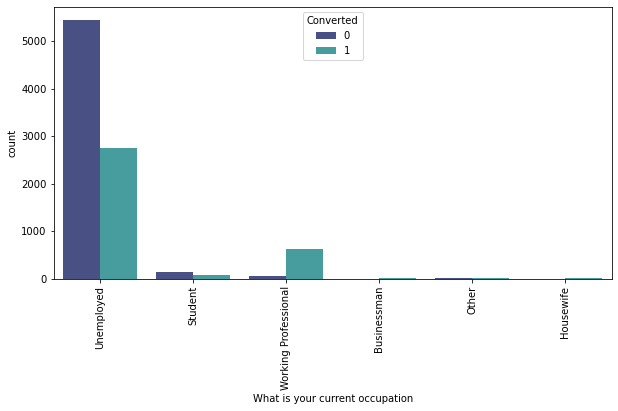

In [74]:
plt.figure(figsize=(10,5))

ax=sns.countplot(edu_lead['What is your current occupation'], hue=edu_lead.Converted,palette="mako")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Observation-

Unemployed leads are the most in terms of Absolute numbers.

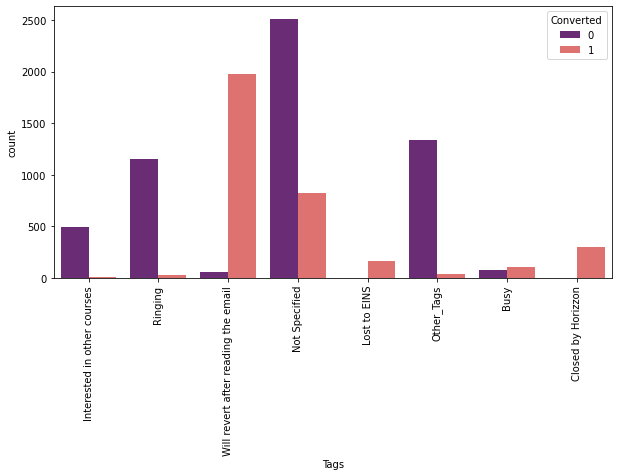

In [75]:
plt.figure(figsize=(10,5))

ax=sns.countplot(edu_lead['Tags'], hue=edu_lead.Converted,palette="magma")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


Observation-

Tags assigned to customers indicating the current status of the lead and here 'will revert after reading the mail ' has high converted rate.

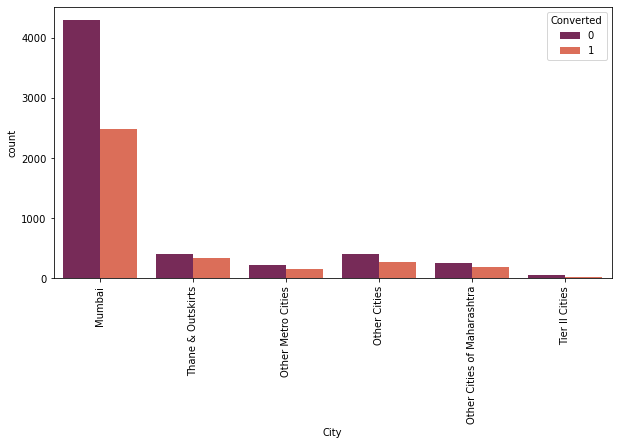

In [76]:
plt.figure(figsize=(10,5))

ax=sns.countplot(edu_lead['City'], hue=edu_lead.Converted,palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

Observation-

Mumbai has high number of customers along with high number of converted lead.

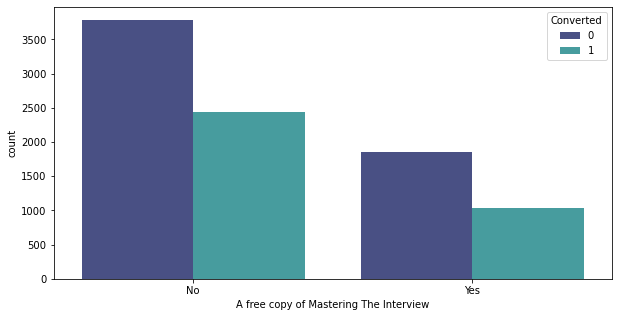

In [77]:
plt.figure(figsize=(10,5))

ax=sns.countplot(edu_lead['A free copy of Mastering The Interview'], hue=edu_lead.Converted,palette="mako")
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

Observation-

Indicates whether the customer wants a free copy of 'Mastering the Interview' or not. Also maximum number of customers along with high leads do not want it.

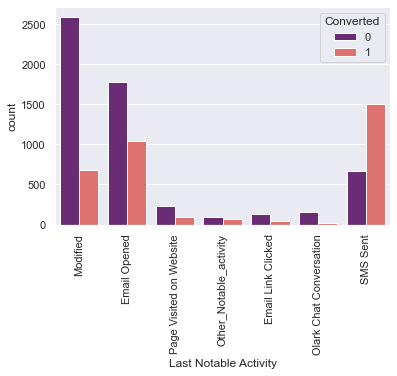

In [78]:
sns.set_theme(style="darkgrid")

ax=sns.countplot(edu_lead['Last Notable Activity'], hue=edu_lead.Converted, palette="magma")#set1,2,3,paired,husl,rocket,mako
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Observation-

The last notable acitivity performed by the student.

Here those who opened mails have high converted lead rate after the ones to whom sms was sent.

#### Numerical Variable :

In [79]:
#Checking the % of Data that has Converted_value_lead = 1:

Converted = (sum(edu_lead['Converted'])/len(edu_lead['Converted'].index))*100
Converted

38.02043282434362

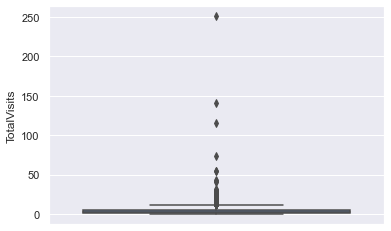

In [80]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=edu_lead['TotalVisits'])
plt.show()

Observation-

The total number of visits made by the customer on the website

It has ouliers that needs to be treated.

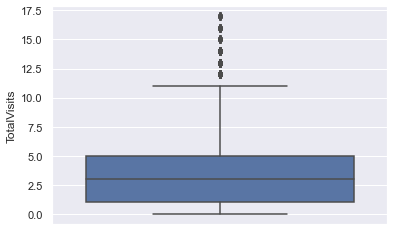

In [81]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = edu_lead.TotalVisits.quantile(0.99)
edu_lead = edu_lead[(edu_lead.TotalVisits <= Q3)]
Q1 = edu_lead.TotalVisits.quantile(0.01)
edu_lead = edu_lead[(edu_lead.TotalVisits >= Q1)]
sns.boxplot(y=edu_lead['TotalVisits'])
plt.show()

Observation-

Median is between 2.5 to 5.0

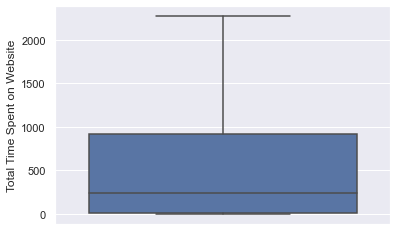

In [82]:
#checking spread of 'Total Time Spent On Website'

plt.figure(figsize=(6,4))
sns.boxplot(y=edu_lead['Total Time Spent on Website'])
plt.show()

Observation-

The total time spent by the customer on the website.

Median is close to 500.

It has no outliers.

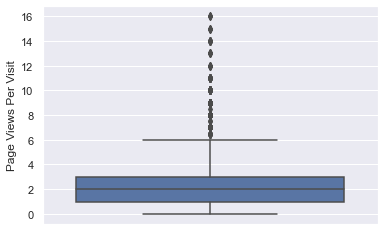

In [83]:
#checking spread of "Page Views Per Visit"
plt.figure(figsize=(6,4))
sns.boxplot(y=edu_lead['Page Views Per Visit'])
plt.show()

Observation-

Average number of pages on the website viewed during the visits.

Median is at 2.

It has outliers that needs to be treated.

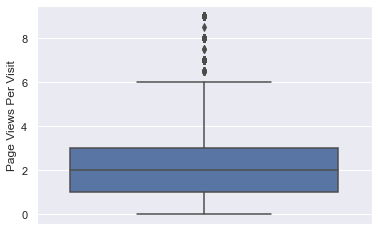

In [84]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = edu_lead['Page Views Per Visit'].quantile(0.99)
edu_lead = edu_lead[edu_lead['Page Views Per Visit'] <= Q3]
Q1 = edu_lead['Page Views Per Visit'].quantile(0.01)
edu_lead = edu_lead[edu_lead['Page Views Per Visit'] >= Q1]
sns.boxplot(y=edu_lead['Page Views Per Visit'])
plt.show()

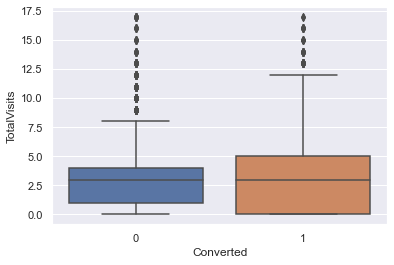

In [85]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = edu_lead)
plt.show()

Observation-

Median for converted and not converted leads are the close.

It cannot affect target variable highly.

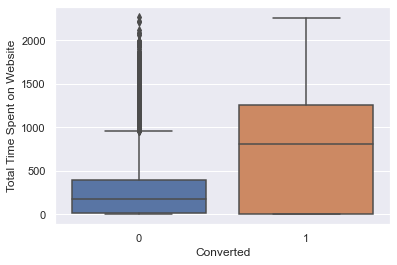

In [86]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = edu_lead)
plt.show()


Observation-

Leads spending more time on the website are more likely to be converted.

Website should be made more engaging to make leads spend more time.

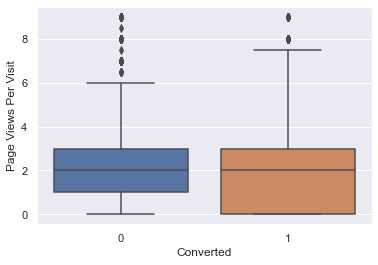

In [87]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = edu_lead)
plt.show()

Observation-

Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

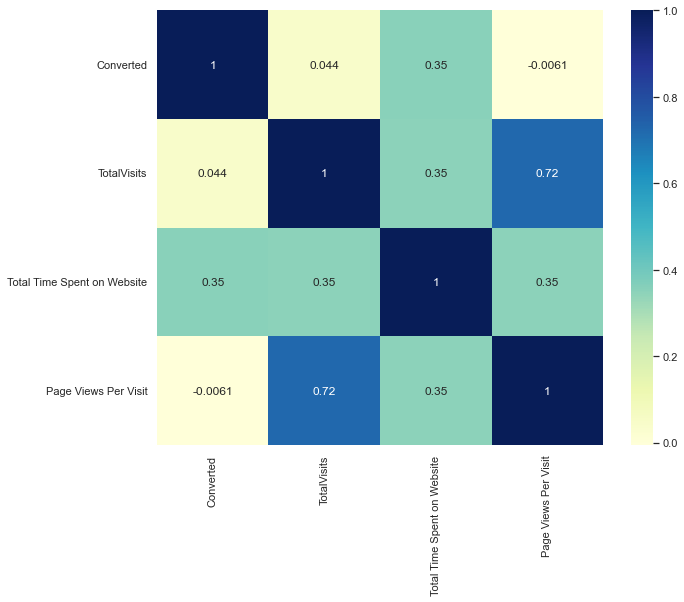

In [88]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(edu_lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

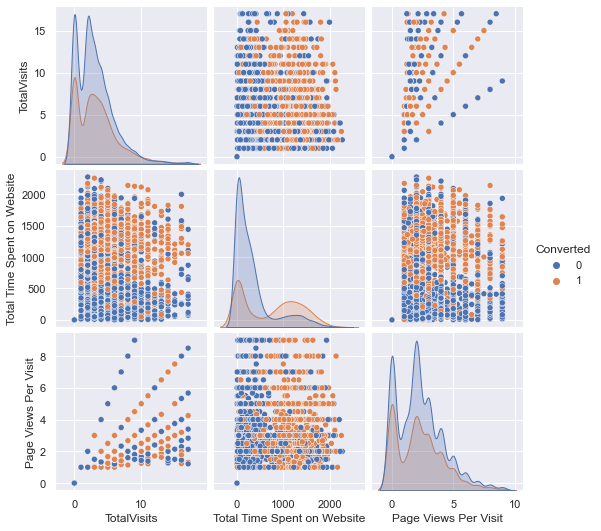

In [89]:
sns.pairplot(edu_lead,diag_kind='kde',hue='Converted')
plt.show()

Observation-

Total visits and Page views per visit are correlated.

## 3) Preparing The Data For Model Building

### Dummy Variable Creation -

In [90]:
#list of categorical columns -

category_columns= edu_lead.select_dtypes(include=['object']).columns
category_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [91]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
edu_lead[varlist] = edu_lead[varlist].apply(binary_map)

In [92]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(edu_lead[['Lead Origin','Lead Source','What is your current occupation',
                             'City','Last Activity','Last Notable Activity','Tags']], drop_first=True)

edu_lead = pd.concat([edu_lead,dummy],1)

In [93]:
dummy = pd.get_dummies(edu_lead['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
edu_lead = pd.concat([edu_lead, dummy], axis = 1)

In [94]:
#dropping the original columns after dummy variable creation

edu_lead.drop(category_columns,1,inplace = True)

In [95]:
edu_lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Different_Management_Specializations,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [96]:
edu_lead.shape

(8953, 59)

## 4)Train-Test Split &
##     Logistic Regression Model Building 

In [97]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = edu_lead['Converted']

y.head()

X=edu_lead.drop('Converted', axis=1)

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [99]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   Lead Source_Facebook                                  6267 non-null   uint8  
 7   Lead Source_Google                                    6267 non-null   uint8  
 8   Lead Source_Live Chat                                 6

In [100]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2686 entries, 7681 to 1005
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           2686 non-null   float64
 1   Total Time Spent on Website                           2686 non-null   int64  
 2   Page Views Per Visit                                  2686 non-null   float64
 3   Lead Origin_Landing Page Submission                   2686 non-null   uint8  
 4   Lead Origin_Lead Add Form                             2686 non-null   uint8  
 5   Lead Origin_Lead Import                               2686 non-null   uint8  
 6   Lead Source_Facebook                                  2686 non-null   uint8  
 7   Lead Source_Google                                    2686 non-null   uint8  
 8   Lead Source_Live Chat                                 2

### Scaling of Data-
### Train Dataset

In [101]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Different_Management_Specializations,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
9196,0.668862,1.848117,1.455819,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


### Model Building using Stats Model & RFE-

In [102]:
import statsmodels.api as sm

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe.support_

array([False,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Other_Lead_Source', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', False, 2),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 2)

In [106]:
#list of RFE supported columns
col_supported = X_train.columns[rfe.support_]
col_supported

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Other_Lead_Source',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other_Notable_activity', 'Last Notable Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Specialization_

In [107]:
#not supported
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'What is your current occupation_Housewife',
       'What is your current occupation_Other', 'What is your current occupation_Student',
       'City_Other Cities', 'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities', 'Last Activity_Email Link Clicked',
       'Last Activity_Other_Last_Activity', 'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Different_Management_Specializations', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising', 'Specialization_Ru

In [108]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col_supported])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.9
Date:                Sun, 12 Jun 2022   Deviance:                       2379.7
Time:                        10:02:03   Pearson chi2:                 7.71e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1327      0.590     -1.919      0.055      -2.290       0.024
Total Time Spent on Website                              1.1036      0.063     17.615      0.000       0.981       1.226
Page Views Per Visit                                    -0.1155      0.081     -1.430      0.153      -0.274       0.043
Lead Origin_Landing Page Submission                     -0.7846      0.146     -5.389      0.000      -1.070      -0.499
Lead Origin_Lead Add Form                                1.2345      0.507      2.436      0.015       0.241       2.228
Lead Origin_Lead Import                                  0.7902      0.832      0.949      0.342      -0.841       2.421
Lead Source_Olark Chat                                   0.7420      0.195      3.798      0.000       0.359       1.125
Lead Source_Other_Lead_Source                            1.1507      1.012      1.137      0.256      -0.834       3.135
Lead Source_Others                                       1.8760      1.296      1.448      0.148      -0.663       4.415
Lead Source_Welingak Website                             4.4881      1.128      3.980      0.000       2.278       6.698
What is your current occupation_Unemployed              -0.1690      0.510     -0.331      0.740      -1.169       0.830
What is your current occupation_Working Professional     0.7851      0.643      1.222      0.222      -0.474       2.045
Last Activity_Email Bounced                             -1.0379      0.520     -1.995      0.046      -2.058      -0.018
Last Activity_Email Opened                               0.8419      0.210      4.018      0.000       0.431       1.253
Last Activity_Form Submitted on Website                  0.9439      0.518      1.821      0.069      -0.072       1.960
Last Activity_Olark Chat Conversation                   -0.5284      0.327     -1.617      0.106      -1.169       0.112
Last Activity_SMS Sent                                   1.5710      0.275      5.717      0.000       1.032       2.110
Last Notable Activity_Modified                          -0.7042      0.197     -3.565      0.000      -1.091      -0.317
Last Notable Activity_Olark Chat Conversation           -0.8522      0.574     -1.484      0.138      -1.978       0.274
Last Notable Activity_Other_Notable_activity             1.2193      0.461      2.642      0.008       0.315       2.124
Last Notable Activity_SMS Sent                           1.4633      0.296      4.951      0.000       0.884       2.043
Tags_Closed by Horizzon                                  6.2819      1.046      6.007      0.000       4.232       8.332
Tags_Interested in other courses                        -3

In [109]:
#dropping column with high p-value

col_supported = col_supported.drop('What is your current occupation_Unemployed',1)

In [110]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col_supported])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.9
Date:                Sun, 12 Jun 2022   Deviance:                       2379.8
Time:                        10:02:04   Pearson chi2:                 7.70e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2981      0.316     -4.111      0.000      -1.917      -0.679
Total Time Spent on Website                              1.1036      0.063     17.615      0.000       0.981       1.226
Page Views Per Visit                                    -0.1160      0.081     -1.435      0.151      -0.274       0.042
Lead Origin_Landing Page Submission                     -0.7837      0.146     -5.382      0.000      -1.069      -0.498
Lead Origin_Lead Add Form                                1.2384      0.506      2.448      0.014       0.247       2.230
Lead Origin_Lead Import                                  0.7888      0.833      0.947      0.343      -0.843       2.421
Lead Source_Olark Chat                                   0.7420      0.195      3.798      0.000       0.359       1.125
Lead Source_Other_Lead_Source                            1.1494      1.012      1.135      0.256      -0.835       3.133
Lead Source_Others                                       1.8717      1.295      1.445      0.148      -0.667       4.410
Lead Source_Welingak Website                             4.4836      1.127      3.978      0.000       2.275       6.693
What is your current occupation_Working Professional     0.9471      0.417      2.272      0.023       0.130       1.764
Last Activity_Email Bounced                             -1.0396      0.521     -1.997      0.046      -2.060      -0.019
Last Activity_Email Opened                               0.8403      0.209      4.012      0.000       0.430       1.251
Last Activity_Form Submitted on Website                  0.9464      0.518      1.826      0.068      -0.069       1.962
Last Activity_Olark Chat Conversation                   -0.5292      0.327     -1.621      0.105      -1.169       0.111
Last Activity_SMS Sent                                   1.5674      0.275      5.709      0.000       1.029       2.106
Last Notable Activity_Modified                          -0.7038      0.198     -3.563      0.000      -1.091      -0.317
Last Notable Activity_Olark Chat Conversation           -0.8530      0.575     -1.485      0.138      -1.979       0.273
Last Notable Activity_Other_Notable_activity             1.2159      0.462      2.634      0.008       0.311       2.120
Last Notable Activity_SMS Sent                           1.4637      0.296      4.951      0.000       0.884       2.043
Tags_Closed by Horizzon                                  6.2817      1.046      6.007      0.000       4.232       8.331
Tags_Interested in other courses                        -3.0115      0.470     -6.414      0.000      -3.932      -2.091
Tags_Lost to EINS                                        4

In [111]:
#dropping column with high p-value

col_supported = col_supported.drop('Lead Origin_Lead Import',1)

In [112]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col_supported])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1190.3
Date:                Sun, 12 Jun 2022   Deviance:                       2380.6
Time:                        10:02:05   Pearson chi2:                 7.68e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6128
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2885      0.315     -4.084      0.000      -1.907      -0.670
Total Time Spent on Website                              1.0988      0.062     17.610      0.000       0.977       1.221
Page Views Per Visit                                    -0.1244      0.080     -1.547      0.122      -0.282       0.033
Lead Origin_Landing Page Submission                     -0.7928      0.145     -5.461      0.000      -1.077      -0.508
Lead Origin_Lead Add Form                                1.2081      0.505      2.393      0.017       0.219       2.198
Lead Source_Olark Chat                                   0.7138      0.193      3.702      0.000       0.336       1.092
Lead Source_Other_Lead_Source                            1.1441      1.012      1.131      0.258      -0.839       3.127
Lead Source_Others                                       1.8721      1.295      1.446      0.148      -0.666       4.410
Lead Source_Welingak Website                             4.4841      1.127      3.978      0.000       2.275       6.694
What is your current occupation_Working Professional     0.9491      0.416      2.279      0.023       0.133       1.765
Last Activity_Email Bounced                             -1.0371      0.521     -1.992      0.046      -2.057      -0.017
Last Activity_Email Opened                               0.8453      0.209      4.036      0.000       0.435       1.256
Last Activity_Form Submitted on Website                  0.9512      0.518      1.836      0.066      -0.064       1.967
Last Activity_Olark Chat Conversation                   -0.5262      0.327     -1.611      0.107      -1.166       0.114
Last Activity_SMS Sent                                   1.5823      0.274      5.773      0.000       1.045       2.120
Last Notable Activity_Modified                          -0.7072      0.198     -3.581      0.000      -1.094      -0.320
Last Notable Activity_Olark Chat Conversation           -0.8513      0.574     -1.482      0.138      -1.977       0.274
Last Notable Activity_Other_Notable_activity             1.2148      0.461      2.632      0.008       0.310       2.119
Last Notable Activity_SMS Sent                           1.4512      0.295      4.916      0.000       0.873       2.030
Tags_Closed by Horizzon                                  6.2856      1.046      6.010      0.000       4.236       8.335
Tags_Interested in other courses                        -3.0116      0.469     -6.416      0.000      -3.931      -2.092
Tags_Lost to EINS                                        4.8826      0.651      7.506      0.000       3.608       6.158
Tags_Not Specified                                      -0

In [113]:
#dropping column with high p-value

col_supported = col_supported.drop('Lead Source_Other_Lead_Source',1)

In [114]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col_supported])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1190.9
Date:                Sun, 12 Jun 2022   Deviance:                       2381.8
Time:                        10:02:06   Pearson chi2:                 7.67e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6127
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2911      0.315     -4.093      0.000      -1.909      -0.673
Total Time Spent on Website                              1.0977      0.062     17.604      0.000       0.976       1.220
Page Views Per Visit                                    -0.1263      0.080     -1.571      0.116      -0.284       0.031
Lead Origin_Landing Page Submission                     -0.7851      0.145     -5.417      0.000      -1.069      -0.501
Lead Origin_Lead Add Form                                1.2119      0.504      2.404      0.016       0.224       2.200
Lead Source_Olark Chat                                   0.7086      0.193      3.677      0.000       0.331       1.086
Lead Source_Others                                       1.8651      1.295      1.440      0.150      -0.673       4.403
Lead Source_Welingak Website                             4.4742      1.127      3.970      0.000       2.266       6.683
What is your current occupation_Working Professional     0.9463      0.416      2.273      0.023       0.130       1.762
Last Activity_Email Bounced                             -1.0393      0.520     -1.998      0.046      -2.059      -0.020
Last Activity_Email Opened                               0.8464      0.209      4.043      0.000       0.436       1.257
Last Activity_Form Submitted on Website                  0.9507      0.518      1.835      0.067      -0.065       1.966
Last Activity_Olark Chat Conversation                   -0.5245      0.327     -1.606      0.108      -1.164       0.115
Last Activity_SMS Sent                                   1.5800      0.274      5.765      0.000       1.043       2.117
Last Notable Activity_Modified                          -0.7098      0.197     -3.595      0.000      -1.097      -0.323
Last Notable Activity_Olark Chat Conversation           -0.8536      0.574     -1.487      0.137      -1.979       0.272
Last Notable Activity_Other_Notable_activity             1.2112      0.461      2.626      0.009       0.307       2.115
Last Notable Activity_SMS Sent                           1.4519      0.295      4.920      0.000       0.873       2.030
Tags_Closed by Horizzon                                  6.2851      1.046      6.010      0.000       4.235       8.335
Tags_Interested in other courses                        -3.0076      0.469     -6.409      0.000      -3.927      -2.088
Tags_Lost to EINS                                        4.8826      0.650      7.506      0.000       3.608       6.158
Tags_Not Specified                                      -0.7627      0.236     -3.236      0.001      -1.225      -0.301
Tags_Other_Tags                                         -3

In [115]:
#dropping column with high p-value

col_supported = col_supported.drop('Lead Source_Others',1)

In [116]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col_supported])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1192.0
Date:                Sun, 12 Jun 2022   Deviance:                       2384.0
Time:                        10:02:06   Pearson chi2:                 7.66e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6126
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2984      0.315     -4.117      0.000      -1.917      -0.680
Total Time Spent on Website                              1.0966      0.062     17.602      0.000       0.975       1.219
Page Views Per Visit                                    -0.1266      0.080     -1.577      0.115      -0.284       0.031
Lead Origin_Landing Page Submission                     -0.7834      0.145     -5.409      0.000      -1.067      -0.500
Lead Origin_Lead Add Form                                1.4772      0.476      3.105      0.002       0.545       2.410
Lead Source_Olark Chat                                   0.7046      0.193      3.659      0.000       0.327       1.082
Lead Source_Welingak Website                             4.2056      1.114      3.775      0.000       2.022       6.389
What is your current occupation_Working Professional     0.9357      0.415      2.254      0.024       0.122       1.750
Last Activity_Email Bounced                             -1.0431      0.519     -2.008      0.045      -2.061      -0.025
Last Activity_Email Opened                               0.8522      0.209      4.072      0.000       0.442       1.262
Last Activity_Form Submitted on Website                  0.9455      0.518      1.826      0.068      -0.069       1.960
Last Activity_Olark Chat Conversation                   -0.5284      0.326     -1.621      0.105      -1.167       0.111
Last Activity_SMS Sent                                   1.5694      0.274      5.731      0.000       1.033       2.106
Last Notable Activity_Modified                          -0.6957      0.197     -3.532      0.000      -1.082      -0.310
Last Notable Activity_Olark Chat Conversation           -0.8405      0.573     -1.466      0.143      -1.964       0.283
Last Notable Activity_Other_Notable_activity             1.2220      0.460      2.655      0.008       0.320       2.124
Last Notable Activity_SMS Sent                           1.4702      0.295      4.987      0.000       0.892       2.048
Tags_Closed by Horizzon                                  6.2282      1.044      5.965      0.000       4.182       8.275
Tags_Interested in other courses                        -3.0128      0.469     -6.423      0.000      -3.932      -2.093
Tags_Lost to EINS                                        4.8776      0.650      7.499      0.000       3.603       6.153
Tags_Not Specified                                      -0.7600      0.236     -3.225      0.001      -1.222      -0.298
Tags_Other_Tags                                         -3.0456      0.300    -10.157      0.000      -3.633      -2.458
Tags_Ringing                                            -4

In [117]:
#dropping column with high p-value

col_supported = col_supported.drop('Last Notable Activity_Olark Chat Conversation',1)

In [118]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col_supported])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1193.1
Date:                Sun, 12 Jun 2022   Deviance:                       2386.3
Time:                        10:02:07   Pearson chi2:                 7.66e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6124
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3539      0.314     -4.318      0.000      -1.969      -0.739
Total Time Spent on Website                              1.0890      0.062     17.601      0.000       0.968       1.210
Page Views Per Visit                                    -0.1284      0.080     -1.599      0.110      -0.286       0.029
Lead Origin_Landing Page Submission                     -0.7828      0.145     -5.411      0.000      -1.066      -0.499
Lead Origin_Lead Add Form                                1.4631      0.475      3.083      0.002       0.533       2.393
Lead Source_Olark Chat                                   0.6979      0.192      3.632      0.000       0.321       1.074
Lead Source_Welingak Website                             4.2167      1.113      3.787      0.000       2.035       6.399
What is your current occupation_Working Professional     0.9378      0.414      2.264      0.024       0.126       1.750
Last Activity_Email Bounced                             -1.0667      0.518     -2.058      0.040      -2.083      -0.051
Last Activity_Email Opened                               0.9006      0.207      4.347      0.000       0.495       1.307
Last Activity_Form Submitted on Website                  0.9060      0.517      1.754      0.080      -0.107       1.919
Last Activity_Olark Chat Conversation                   -0.7689      0.291     -2.642      0.008      -1.339      -0.199
Last Activity_SMS Sent                                   1.5265      0.272      5.622      0.000       0.994       2.059
Last Notable Activity_Modified                          -0.5891      0.181     -3.250      0.001      -0.944      -0.234
Last Notable Activity_Other_Notable_activity             1.2947      0.457      2.831      0.005       0.398       2.191
Last Notable Activity_SMS Sent                           1.5744      0.285      5.525      0.000       1.016       2.133
Tags_Closed by Horizzon                                  6.2052      1.043      5.947      0.000       4.160       8.250
Tags_Interested in other courses                        -3.0270      0.469     -6.459      0.000      -3.946      -2.108
Tags_Lost to EINS                                        4.8749      0.652      7.478      0.000       3.597       6.153
Tags_Not Specified                                      -0.7660      0.236     -3.251      0.001      -1.228      -0.304
Tags_Other_Tags                                         -3.0462      0.300    -10.164      0.000      -3.634      -2.459
Tags_Ringing                                            -4.1806      0.321    -13.015      0.000      -4.810      -3.551
Tags_Will revert after reading the email                 3

In [119]:
#dropping column with high p-value

col_supported = col_supported.drop('Specialization_Banking, Investment And Insurance',1)

In [120]:
#BUILDING MODEL #7

X_train_sm = sm.add_constant(X_train[col_supported])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.3
Date:                Sun, 12 Jun 2022   Deviance:                       2388.6
Time:                        10:02:07   Pearson chi2:                 7.74e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6123
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3569      0.314     -4.327      0.000      -1.971      -0.742
Total Time Spent on Website                              1.0883      0.062     17.586      0.000       0.967       1.210
Page Views Per Visit                                    -0.1252      0.080     -1.561      0.119      -0.282       0.032
Lead Origin_Landing Page Submission                     -0.7550      0.143     -5.267      0.000      -1.036      -0.474
Lead Origin_Lead Add Form                                1.4810      0.473      3.134      0.002       0.555       2.407
Lead Source_Olark Chat                                   0.6992      0.192      3.639      0.000       0.323       1.076
Lead Source_Welingak Website                             4.2000      1.113      3.775      0.000       2.019       6.381
What is your current occupation_Working Professional     0.9210      0.414      2.227      0.026       0.110       1.732
Last Activity_Email Bounced                             -1.0907      0.519     -2.102      0.036      -2.108      -0.074
Last Activity_Email Opened                               0.9120      0.207      4.400      0.000       0.506       1.318
Last Activity_Form Submitted on Website                  0.9241      0.519      1.779      0.075      -0.094       1.942
Last Activity_Olark Chat Conversation                   -0.7503      0.290     -2.586      0.010      -1.319      -0.182
Last Activity_SMS Sent                                   1.5385      0.271      5.669      0.000       1.007       2.070
Last Notable Activity_Modified                          -0.5889      0.181     -3.245      0.001      -0.945      -0.233
Last Notable Activity_Other_Notable_activity             1.3232      0.457      2.897      0.004       0.428       2.218
Last Notable Activity_SMS Sent                           1.5682      0.285      5.506      0.000       1.010       2.126
Tags_Closed by Horizzon                                  6.1822      1.043      5.926      0.000       4.138       8.227
Tags_Interested in other courses                        -3.0337      0.469     -6.472      0.000      -3.952      -2.115
Tags_Lost to EINS                                        4.9068      0.656      7.474      0.000       3.620       6.193
Tags_Not Specified                                      -0.7698      0.235     -3.269      0.001      -1.231      -0.308
Tags_Other_Tags                                         -3.0596      0.300    -10.211      0.000      -3.647      -2.472
Tags_Ringing                                            -4.1851      0.321    -13.029      0.000      -4.815      -3.556
Tags_Will revert after reading the email                 3

In [121]:
#dropping column with high p-value

col_supported = col_supported.drop('Page Views Per Visit',1)

In [122]:
#BUILDING MODEL #8

X_train_sm = sm.add_constant(X_train[col_supported])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6244
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1195.5
Date:                Sun, 12 Jun 2022   Deviance:                       2391.1
Time:                        10:02:08   Pearson chi2:                 7.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3566      0.313     -4.336      0.000      -1.970      -0.743
Total Time Spent on Website                              1.0841      0.062     17.568      0.000       0.963       1.205
Lead Origin_Landing Page Submission                     -0.8134      0.138     -5.884      0.000      -1.084      -0.542
Lead Origin_Lead Add Form                                1.6303      0.463      3.522      0.000       0.723       2.538
Lead Source_Olark Chat                                   0.8395      0.170      4.929      0.000       0.506       1.173
Lead Source_Welingak Website                             4.1990      1.112      3.775      0.000       2.019       6.379
What is your current occupation_Working Professional     0.9291      0.414      2.245      0.025       0.118       1.740
Last Activity_Email Bounced                             -1.0607      0.521     -2.035      0.042      -2.082      -0.039
Last Activity_Email Opened                               0.8967      0.207      4.336      0.000       0.491       1.302
Last Activity_Form Submitted on Website                  0.9165      0.519      1.767      0.077      -0.100       1.933
Last Activity_Olark Chat Conversation                   -0.7654      0.290     -2.637      0.008      -1.334      -0.196
Last Activity_SMS Sent                                   1.5180      0.271      5.600      0.000       0.987       2.049
Last Notable Activity_Modified                          -0.5827      0.181     -3.213      0.001      -0.938      -0.227
Last Notable Activity_Other_Notable_activity             1.2898      0.458      2.816      0.005       0.392       2.188
Last Notable Activity_SMS Sent                           1.5745      0.285      5.532      0.000       1.017       2.132
Tags_Closed by Horizzon                                  6.1688      1.042      5.919      0.000       4.126       8.212
Tags_Interested in other courses                        -3.0373      0.469     -6.479      0.000      -3.956      -2.118
Tags_Lost to EINS                                        4.9460      0.656      7.538      0.000       3.660       6.232
Tags_Not Specified                                      -0.7645      0.235     -3.254      0.001      -1.225      -0.304
Tags_Other_Tags                                         -3.0474      0.299    -10.190      0.000      -3.634      -2.461
Tags_Ringing                                            -4.1885      0.321    -13.057      0.000      -4.817      -3.560
Tags_Will revert after reading the email                 3.8163      0.292     13.061      0.000       3.244       4.389
Specialization_Travel and Tourism                       -0

In [123]:
#dropping column with high p-value

col_supported = col_supported.drop('Last Activity_Form Submitted on Website',1)

In [124]:
#BUILDING MODEL #9

X_train_sm = sm.add_constant(X_train[col_supported])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6245
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1197.0
Date:                Sun, 12 Jun 2022   Deviance:                       2394.1
Time:                        10:02:08   Pearson chi2:                 7.88e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6120
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2712      0.307     -4.137      0.000      -1.873      -0.669
Total Time Spent on Website                              1.0887      0.062     17.657      0.000       0.968       1.210
Lead Origin_Landing Page Submission                     -0.8111      0.138     -5.867      0.000      -1.082      -0.540
Lead Origin_Lead Add Form                                1.6374      0.462      3.541      0.000       0.731       2.544
Lead Source_Olark Chat                                   0.8460      0.170      4.969      0.000       0.512       1.180
Lead Source_Welingak Website                             4.1914      1.112      3.771      0.000       2.013       6.370
What is your current occupation_Working Professional     0.9533      0.413      2.306      0.021       0.143       1.764
Last Activity_Email Bounced                             -1.1354      0.518     -2.190      0.028      -2.151      -0.119
Last Activity_Email Opened                               0.8284      0.201      4.127      0.000       0.435       1.222
Last Activity_Olark Chat Conversation                   -0.8550      0.284     -3.005      0.003      -1.413      -0.297
Last Activity_SMS Sent                                   1.4118      0.262      5.383      0.000       0.898       1.926
Last Notable Activity_Modified                          -0.5414      0.179     -3.032      0.002      -0.891      -0.191
Last Notable Activity_Other_Notable_activity             1.2720      0.459      2.773      0.006       0.373       2.171
Last Notable Activity_SMS Sent                           1.6162      0.283      5.713      0.000       1.062       2.171
Tags_Closed by Horizzon                                  6.1063      1.041      5.864      0.000       4.065       8.147
Tags_Interested in other courses                        -3.0674      0.469     -6.544      0.000      -3.986      -2.149
Tags_Lost to EINS                                        4.9341      0.656      7.518      0.000       3.648       6.220
Tags_Not Specified                                      -0.7918      0.234     -3.379      0.001      -1.251      -0.332
Tags_Other_Tags                                         -3.0753      0.299    -10.294      0.000      -3.661      -2.490
Tags_Ringing                                            -4.2134      0.321    -13.139      0.000      -4.842      -3.585
Tags_Will revert after reading the email                 3.7788      0.291     13.002      0.000       3.209       4.348
Specialization_Travel and Tourism                       -0.8873      0.475     -1.869      0.062      -1.818       0.043
==========================================================

In [125]:
#dropping column with high p-value

col_supported = col_supported.drop('Specialization_Travel and Tourism',1)

In [126]:
#BUILDING MODEL #10

X_train_sm = sm.add_constant(X_train[col_supported])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1198.9
Date:                Sun, 12 Jun 2022   Deviance:                       2397.7
Time:                        10:02:09   Pearson chi2:                 7.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6117
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2752      0.307     -4.155      0.000      -1.877      -0.674
Total Time Spent on Website                              1.0891      0.062     17.672      0.000       0.968       1.210
Lead Origin_Landing Page Submission                     -0.8339      0.138     -6.050      0.000      -1.104      -0.564
Lead Origin_Lead Add Form                                1.6409      0.461      3.562      0.000       0.738       2.544
Lead Source_Olark Chat                                   0.8446      0.170      4.961      0.000       0.511       1.178
Lead Source_Welingak Website                             4.1890      1.111      3.771      0.000       2.012       6.366
What is your current occupation_Working Professional     0.9806      0.412      2.382      0.017       0.174       1.788
Last Activity_Email Bounced                             -1.1309      0.516     -2.191      0.028      -2.142      -0.119
Last Activity_Email Opened                               0.8398      0.201      4.180      0.000       0.446       1.234
Last Activity_Olark Chat Conversation                   -0.8387      0.284     -2.953      0.003      -1.395      -0.282
Last Activity_SMS Sent                                   1.4034      0.261      5.367      0.000       0.891       1.916
Last Notable Activity_Modified                          -0.5438      0.179     -3.046      0.002      -0.894      -0.194
Last Notable Activity_Other_Notable_activity             1.2897      0.459      2.812      0.005       0.391       2.188
Last Notable Activity_SMS Sent                           1.6359      0.282      5.796      0.000       1.083       2.189
Tags_Closed by Horizzon                                  6.0961      1.041      5.855      0.000       4.056       8.137
Tags_Interested in other courses                        -3.0824      0.468     -6.591      0.000      -3.999      -2.166
Tags_Lost to EINS                                        4.9500      0.656      7.546      0.000       3.664       6.236
Tags_Not Specified                                      -0.7962      0.234     -3.409      0.001      -1.254      -0.338
Tags_Other_Tags                                         -3.0789      0.298    -10.333      0.000      -3.663      -2.495
Tags_Ringing                                            -4.2103      0.320    -13.152      0.000      -4.838      -3.583
Tags_Will revert after reading the email                 3.7487      0.289     12.981      0.000       3.183       4.315
========================================================================================================================
"""

In [127]:
#dropping column with high p-value

col_supported = col_supported.drop('Last Activity_Email Bounced',1)

In [128]:
#BUILDING MODEL #11

X_train_sm = sm.add_constant(X_train[col_supported])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.6
Date:                Sun, 12 Jun 2022   Deviance:                       2403.2
Time:                        10:02:10   Pearson chi2:                 7.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6114
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3088      0.308     -4.243      0.000      -1.913      -0.704
Total Time Spent on Website                              1.0848      0.061     17.659      0.000       0.964       1.205
Lead Origin_Landing Page Submission                     -0.8482      0.138     -6.164      0.000      -1.118      -0.578
Lead Origin_Lead Add Form                                1.6285      0.460      3.538      0.000       0.726       2.531
Lead Source_Olark Chat                                   0.8280      0.170      4.875      0.000       0.495       1.161
Lead Source_Welingak Website                             4.1770      1.111      3.759      0.000       1.999       6.355
What is your current occupation_Working Professional     0.9965      0.412      2.416      0.016       0.188       1.805
Last Activity_Email Opened                               0.9118      0.200      4.553      0.000       0.519       1.304
Last Activity_Olark Chat Conversation                   -0.7449      0.282     -2.643      0.008      -1.297      -0.192
Last Activity_SMS Sent                                   1.5118      0.258      5.866      0.000       1.007       2.017
Last Notable Activity_Modified                          -0.5850      0.179     -3.270      0.001      -0.936      -0.234
Last Notable Activity_Other_Notable_activity             0.9145      0.418      2.188      0.029       0.095       1.734
Last Notable Activity_SMS Sent                           1.5941      0.283      5.641      0.000       1.040       2.148
Tags_Closed by Horizzon                                  6.1083      1.042      5.864      0.000       4.067       8.150
Tags_Interested in other courses                        -3.1098      0.468     -6.643      0.000      -4.027      -2.192
Tags_Lost to EINS                                        4.9535      0.657      7.543      0.000       3.666       6.241
Tags_Not Specified                                      -0.8214      0.234     -3.506      0.000      -1.281      -0.362
Tags_Other_Tags                                         -3.1012      0.298    -10.390      0.000      -3.686      -2.516
Tags_Ringing                                            -4.2285      0.321    -13.185      0.000      -4.857      -3.600
Tags_Will revert after reading the email                 3.7489      0.290     12.944      0.000       3.181       4.317
========================================================================================================================
"""

In [129]:
#dropping column with high p-value

col_supported = col_supported.drop('Last Notable Activity_Other_Notable_activity',1)

In [130]:
#BUILDING MODEL #12

X_train_sm = sm.add_constant(X_train[col_supported])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.9
Date:                Sun, 12 Jun 2022   Deviance:                       2407.8
Time:                        10:02:10   Pearson chi2:                 7.69e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6111
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1307      0.295     -3.827      0.000      -1.710      -0.552
Total Time Spent on Website                              1.0839      0.061     17.671      0.000       0.964       1.204
Lead Origin_Landing Page Submission                     -0.8502      0.137     -6.186      0.000      -1.120      -0.581
Lead Origin_Lead Add Form                                1.6355      0.459      3.559      0.000       0.735       2.536
Lead Source_Olark Chat                                   0.8227      0.170      4.852      0.000       0.490       1.155
Lead Source_Welingak Website                             4.1684      1.111      3.754      0.000       1.992       6.345
What is your current occupation_Working Professional     0.9918      0.412      2.408      0.016       0.185       1.799
Last Activity_Email Opened                               0.7445      0.182      4.098      0.000       0.388       1.101
Last Activity_Olark Chat Conversation                   -0.8555      0.275     -3.108      0.002      -1.395      -0.316
Last Activity_SMS Sent                                   1.4325      0.253      5.654      0.000       0.936       1.929
Last Notable Activity_Modified                          -0.6872      0.173     -3.980      0.000      -1.026      -0.349
Last Notable Activity_SMS Sent                           1.4921      0.279      5.356      0.000       0.946       2.038
Tags_Closed by Horizzon                                  6.1158      1.042      5.871      0.000       4.074       8.158
Tags_Interested in other courses                        -3.0862      0.468     -6.593      0.000      -4.004      -2.169
Tags_Lost to EINS                                        4.9401      0.656      7.526      0.000       3.654       6.227
Tags_Not Specified                                      -0.8155      0.234     -3.479      0.001      -1.275      -0.356
Tags_Other_Tags                                         -3.0950      0.299    -10.368      0.000      -3.680      -2.510
Tags_Ringing                                            -4.2246      0.321    -13.175      0.000      -4.853      -3.596
Tags_Will revert after reading the email                 3.7573      0.289     12.980      0.000       3.190       4.325
========================================================================================================================
"""

In [131]:
#dropping column with high p-value

col_supported = col_supported.drop('What is your current occupation_Working Professional',1)

In [132]:
#BUILDING MODEL #13

X_train_sm = sm.add_constant(X_train[col_supported])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1207.1
Date:                Sun, 12 Jun 2022   Deviance:                       2414.2
Time:                        10:02:11   Pearson chi2:                 7.85e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6107
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1357      0.295     -3.848      0.000      -1.714      -0.557
Total Time Spent on Website                  1.0844      0.061     17.691      0.000       0.964       1.205
Lead Origin_Landing Page Submission         -0.8394      0.137     -6.117      0.000      -1.108      -0.570
Lead Origin_Lead Add Form                    1.6697      0.462      3.616      0.000       0.765       2.575
Lead Source_Olark Chat                       0.8292      0.170      4.892      0.000       0.497       1.161
Lead Source_Welingak Website                 4.1361      1.111      3.721      0.000       1.958       6.315
Last Activity_Email Opened                   0.7372      0.181      4.070      0.000       0.382       1.092
Last Activity_Olark Chat Conversation       -0.8710      0.275     -3.164      0.002      -1.411      -0.331
Last Activity_SMS Sent                       1.4313      0.253      5.658      0.000       0.935       1.927
Last Notable Activity_Modified              -0.6875      0.172     -3.986      0.000      -1.026      -0.349
Last Notable Activity_SMS Sent               1.4902      0.278      5.351      0.000       0.944       2.036
Tags_Closed by Horizzon                      6.2742      1.041      6.030      0.000       4.235       8.314
Tags_Interested in other courses            -3.0272      0.469     -6.458      0.000      -3.946      -2.108
Tags_Lost to EINS                            4.9591      0.656      7.563      0.000       3.674       6.244
Tags_Not Specified                          -0.8076      0.234     -3.445      0.001      -1.267      -0.348
Tags_Other_Tags                             -3.0769      0.299    -10.308      0.000      -3.662      -2.492
Tags_Ringing                                -4.2072      0.320    -13.145      0.000      -4.834      -3.580
Tags_Will revert after reading the email     3.9071      0.286     13.665      0.000       3.347       4.467
============================================================================================================
"""

In [133]:
#dropping column with high p-value

col_supported = col_supported.drop('Last Activity_Olark Chat Conversation',1)

In [134]:
#BUILDING MODEL #14

X_train_sm = sm.add_constant(X_train[col_supported])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1212.4
Date:                Sun, 12 Jun 2022   Deviance:                       2424.7
Time:                        10:02:11   Pearson chi2:                 7.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6101
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3704      0.290     -4.723      0.000      -1.939      -0.802
Total Time Spent on Website                  1.0830      0.061     17.642      0.000       0.963       1.203
Lead Origin_Landing Page Submission         -0.8117      0.137     -5.910      0.000      -1.081      -0.543
Lead Origin_Lead Add Form                    1.6737      0.462      3.620      0.000       0.768       2.580
Lead Source_Olark Chat                       0.7372      0.167      4.413      0.000       0.410       1.065
Lead Source_Welingak Website                 4.1825      1.114      3.753      0.000       1.998       6.367
Last Activity_Email Opened                   1.0024      0.167      6.019      0.000       0.676       1.329
Last Activity_SMS Sent                       1.7198      0.240      7.152      0.000       1.248       2.191
Last Notable Activity_Modified              -0.7322      0.172     -4.255      0.000      -1.069      -0.395
Last Notable Activity_SMS Sent               1.4530      0.279      5.214      0.000       0.907       1.999
Tags_Closed by Horizzon                      6.3281      1.042      6.075      0.000       4.287       8.370
Tags_Interested in other courses            -3.0460      0.470     -6.479      0.000      -3.968      -2.125
Tags_Lost to EINS                            4.9545      0.653      7.582      0.000       3.674       6.235
Tags_Not Specified                          -0.8227      0.236     -3.486      0.000      -1.285      -0.360
Tags_Other_Tags                             -3.0933      0.300    -10.316      0.000      -3.681      -2.506
Tags_Ringing                                -4.2267      0.321    -13.157      0.000      -4.856      -3.597
Tags_Will revert after reading the email     3.9431      0.288     13.678      0.000       3.378       4.508
============================================================================================================
"""

In [135]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_supported].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_supported].values, i) for i in range(X_train[col_supported].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Notable Activity_SMS Sent,6.96
6,Last Activity_SMS Sent,6.31
12,Tags_Not Specified,4.12
1,Lead Origin_Landing Page Submission,3.45
15,Tags_Will revert after reading the email,3.37
7,Last Notable Activity_Modified,2.97
5,Last Activity_Email Opened,2.95
13,Tags_Other_Tags,2.32
3,Lead Source_Olark Chat,2.22
14,Tags_Ringing,2.17


In [137]:
#dropping variable with high VIF

col_supported = col_supported.drop('Last Notable Activity_SMS Sent',1)

In [138]:
#BUILDING MODEL #15

X_train_sm = sm.add_constant(X_train[col_supported])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1226.4
Date:                Sun, 12 Jun 2022   Deviance:                       2452.7
Time:                        10:02:12   Pearson chi2:                 8.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6083
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0227      0.276     -3.700      0.000      -1.564      -0.481
Total Time Spent on Website                  1.0770      0.061     17.689      0.000       0.958       1.196
Lead Origin_Landing Page Submission         -0.8192      0.136     -6.034      0.000      -1.085      -0.553
Lead Origin_Lead Add Form                    1.6892      0.468      3.606      0.000       0.771       2.607
Lead Source_Olark Chat                       0.7522      0.165      4.555      0.000       0.429       1.076
Lead Source_Welingak Website                 4.1320      1.120      3.689      0.000       1.937       6.327
Last Activity_Email Opened                   0.7353      0.157      4.673      0.000       0.427       1.044
Last Activity_SMS Sent                       2.6302      0.161     16.349      0.000       2.315       2.946
Last Notable Activity_Modified              -1.3377      0.135     -9.875      0.000      -1.603      -1.072
Tags_Closed by Horizzon                      6.5538      1.043      6.284      0.000       4.510       8.598
Tags_Interested in other courses            -3.0008      0.468     -6.413      0.000      -3.918      -2.084
Tags_Lost to EINS                            5.1325      0.656      7.818      0.000       3.846       6.419
Tags_Not Specified                          -0.8537      0.232     -3.687      0.000      -1.308      -0.400
Tags_Other_Tags                             -3.0424      0.295    -10.311      0.000      -3.621      -2.464
Tags_Ringing                                -4.0947      0.315    -12.980      0.000      -4.713      -3.476
Tags_Will revert after reading the email     4.0086      0.288     13.911      0.000       3.444       4.573
============================================================================================================
"""

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_supported].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_supported].values, i) for i in range(X_train[col_supported].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Not Specified,3.89
1,Lead Origin_Landing Page Submission,3.45
14,Tags_Will revert after reading the email,3.12
5,Last Activity_Email Opened,2.74
6,Last Activity_SMS Sent,2.44
7,Last Notable Activity_Modified,2.22
3,Lead Source_Olark Chat,2.21
12,Tags_Other_Tags,2.20
2,Lead Origin_Lead Add Form,2.13
13,Tags_Ringing,2.04


Observation-

So the Values all seem to be in order so now, moving on to derive the Probabilities, Lead Score, Predictions on Train Data.

In [140]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.211502
4696    0.033992
3274    0.319306
2164    0.003959
1667    0.993798
7024    0.209456
8018    0.112690
778     0.108660
6942    0.003721
4440    0.089676
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21150238, 0.03399167, 0.31930608, 0.00395911, 0.99379758,
       0.20945644, 0.11269036, 0.10866013, 0.00372145, 0.08967596])

In [142]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.211502,9196
1,0,0.033992,4696
2,0,0.319306,3274
3,0,0.003959,2164
4,1,0.993798,1667


In [143]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.211502,9196,0
1,0,0.033992,4696,0
2,0,0.319306,3274,0
3,0,0.003959,2164,0
4,1,0.993798,1667,1


## 5) Model Evaluation

In [144]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3717  165]
 [ 290 2095]]


In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9273974788575076


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8784067085953878

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.9574961360123647

In [149]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04250386398763524


In [150]:
# positive predictive value 
print (TP / float(TP+FP))

0.9269911504424779


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9276266533566259


###  ROC CURVE

In [152]:
def draw_roc( actual, prob ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, prob,
                                              drop_intermediate = False )
    auctual_score = metrics.roc_auc_score( actual, prob )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auctual_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

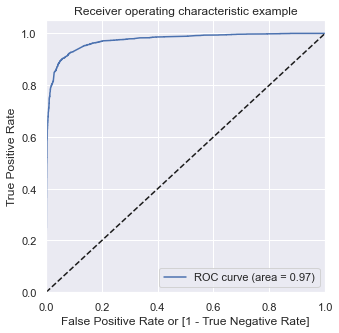

In [154]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Observation-

The ROC Curve should have value close to 1. Our graph shows that we are getting a good value of 0.97 indicating a good predictive model.

###  Optimal Cutoff Point


We have chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value ,which is dealt below-

In [155]:
# Let's create columns with different probability cutoffs 
numbers_cutoff = [float(x)/10 for x in range(10)]
for i in numbers_cutoff:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.211502,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.033992,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.319306,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.003959,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.993798,1667,1,1,1,1,1,1,1,1,1,1,1


In [156]:
# Now let's calculate accuracy ,sensitivity and specificity for various probability cutoffs.
cutoff_dataframe = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
number = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in number:
    conf_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(conf_mat))
    accuracy = (conf_mat[0,0]+conf_mat[1,1])/total1
    
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    cutoff_dataframe.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_dataframe)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.380565     1.000000     0.000000
0.1          0.1  0.836604     0.974004     0.752190
0.2          0.2  0.896282     0.953040     0.861412
0.3          0.3  0.919738     0.916981     0.921432
0.4          0.4  0.926919     0.897275     0.945131
0.5          0.5  0.927397     0.878407     0.957496
0.6          0.6  0.923887     0.853669     0.967027
0.7          0.7  0.911920     0.802516     0.979134
0.8          0.8  0.905856     0.776939     0.985059
0.9          0.9  0.884155     0.711530     0.990211


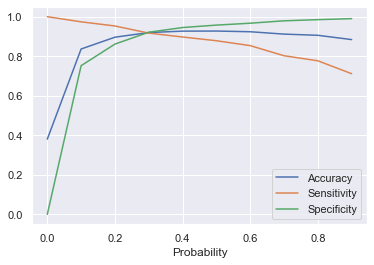

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_dataframe.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [158]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.211502,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.033992,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.319306,3274,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.003959,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.993798,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [159]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.211502,9196,0,21
1,0,0.033992,4696,0,3
2,0,0.319306,3274,1,32
3,0,0.003959,2164,0,0
4,1,0.993798,1667,1,99


In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.919738311791926

In [161]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3577,  305],
       [ 198, 2187]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.9214322514167954

Observation-

Accuracy:91.97%

Sensitivity:91.69%

Specificity:92.14%

In [165]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07856774858320453


In [166]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8776083467094703


In [167]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9475496688741721


In [168]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3577,  305],
       [ 198, 2187]], dtype=int64)

In [169]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8776083467094703

In [170]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [171]:
from sklearn.metrics import precision_score, recall_score

In [172]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8776083467094703

In [173]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [174]:
from sklearn.metrics import precision_recall_curve

In [175]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

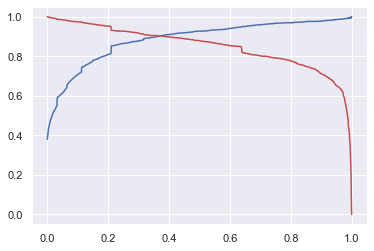

In [176]:
# Plotting the precision recall curve
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Observation-

The precision and Recall seem to have trade-off at .38.

## 6) Prediction on Test Dataset 

In [177]:
#scaling test set

number_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[number_cols] = scaler.fit_transform(X_test[number_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Different_Management_Specializations,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [178]:
X_test = X_test[col_supported]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,1,0,0,0,0,1,0,0,0,0,0,0,1,0
984,-0.550262,1,0,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,1,0,0,0,0,1,0,0,0,0,1,0,0,0
6915,-0.628665,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [179]:
X_test_sm = sm.add_constant(X_test)

### Predictions On Test Set -

In [180]:
y_test_pred = res.predict(X_test_sm)

In [181]:
y_test_pred[:10]

7681    0.025541
984     0.015003
8135    0.692033
6915    0.002792
2712    0.963292
244     0.001983
4698    0.003178
8287    0.031600
6791    0.988266
8970    0.003421
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Let's see the head
y_pred_1.head()

,0
7681,0.025541
984,0.015003
8135,0.692033
6915,0.002792
2712,0.963292


In [184]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [185]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [186]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [188]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.025541
1,0,984,0.015003
2,0,8135,0.692033
3,0,6915,0.002792
4,1,2712,0.963292


In [189]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [190]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.025541
1,0,984,0.015003
2,0,8135,0.692033
3,0,6915,0.002792
4,1,2712,0.963292


In [191]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [192]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.025541,3
1,984,0,0.015003,2
2,8135,0,0.692033,69
3,6915,0,0.002792,0
4,2712,1,0.963292,96


In [193]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [194]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.025541,3,0
1,984,0,0.015003,2,0
2,8135,0,0.692033,69,1
3,6915,0,0.002792,0,0
4,2712,1,0.963292,96,1


In [195]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9251675353685778

In [196]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1557,  119],
       [  82,  928]], dtype=int64)

In [197]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9188118811881189

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.9289976133651552

In [200]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8863419293218721

In [201]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9188118811881189

##### Observation

The values obtained after running the model on Test Data are -

Accuracy : 92.51%

Sensitivity : 91.88%

Specificity : 92.89%

## 7) Final Observation

Train Data:

Observation-

Accuracy:91.97%

Sensitivity:91.69%

Specificity:92.14%


Test Data:

Accuracy : 92.51%

Sensitivity : 91.88%

Specificity : 92.89%


The CEO has given a ballpark of the target lead conversion rate to be around 80%.So after running the model we get ,the model seems to predict the Conversion Rate very well.